# BREAST Cancer - No Feature Extraction method (NFE) on all features - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_T.ALL.Feat.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,1-hexadecanol,1-monostearin,"1,2,4-benzenetriol","1,5-anhydroglucitol",2-aminoadipic acid,2-hydroxybutanoic acid,2-hydroxyglutaric acid,2-hydroxyvaleric acid,2-ketoadipic acid,2-ketoglucose dimethylacetal NIST,...,trehalose,tryptophan,tyrosine,uracil,urea,uric acid,uridine,uridine-5'-monophosphate,valine,xanthine
0,11.112099,9.907075,11.093423,14.241355,11.218484,13.902791,12.234127,14.627043,12.729476,6.223646,...,13.176623,13.820936,16.940040,15.026577,17.861534,12.452281,8.127786,7.367381,17.127506,8.944028
1,11.658437,10.598369,11.993399,12.298942,10.547373,14.436735,13.568694,16.712891,13.405477,7.022020,...,11.458791,13.027484,15.605371,14.627023,18.212003,12.266689,9.380577,7.969552,16.409022,8.477699
2,10.390127,9.326581,11.281837,13.564650,10.040969,14.128271,15.332380,15.050071,12.108104,5.886435,...,11.289519,13.855135,16.900707,16.274211,18.011109,13.129556,11.453729,8.158895,17.509767,12.609300
3,12.160193,10.918137,12.934515,15.019961,8.797349,15.122361,12.440414,17.579449,14.190136,7.947374,...,13.753774,13.158752,15.397058,13.580863,18.480319,13.200915,8.236881,8.414879,16.993555,9.401940
4,10.185206,9.069104,12.949058,13.842015,10.764847,14.633731,13.155491,14.434416,12.115098,6.417608,...,11.772042,14.174385,16.745180,15.973334,19.110742,14.444388,11.928346,7.679578,17.874280,9.202908


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[10  7]
 [ 1 50]]
0.8823529411764706
0.7843137254901961
0.9259259259259259
0.8771929824561403
0.9803921568627451
0.9192618223760092


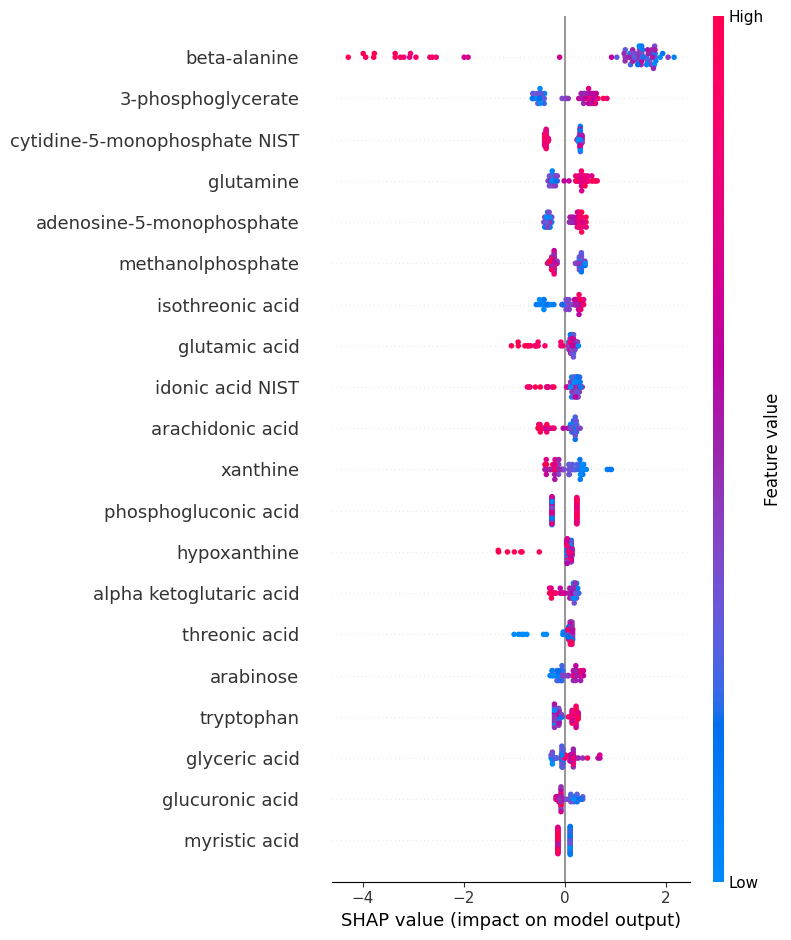

[[10  7]
 [ 1 50]]
0.8823529411764706
0.7843137254901961
0.9259259259259259
0.8771929824561403
0.9803921568627451
0.8350634371395618


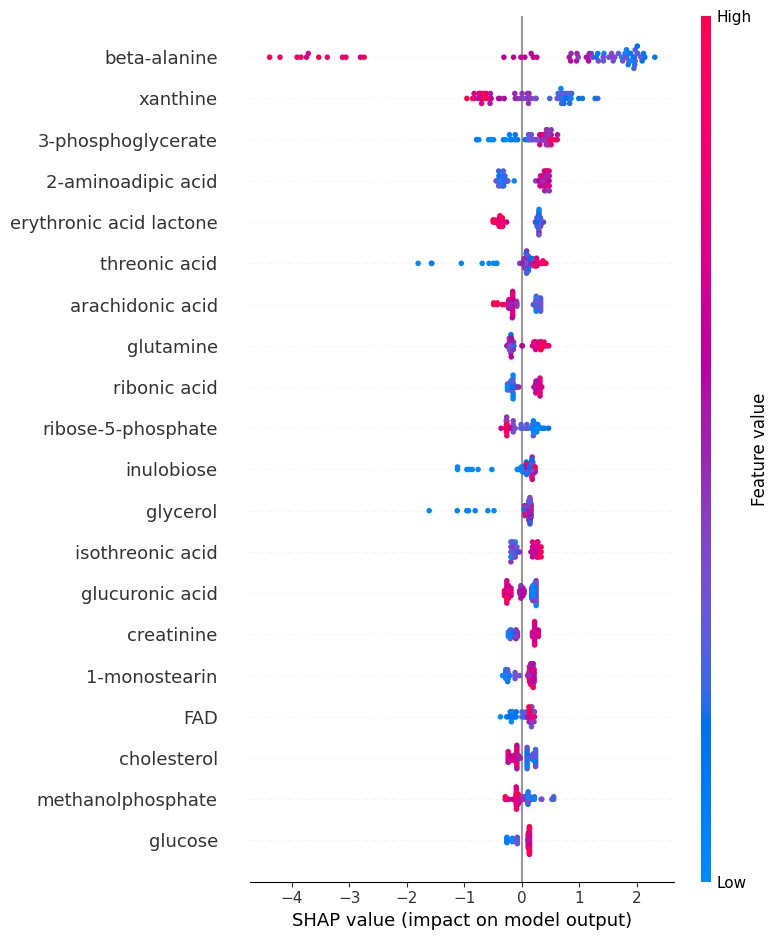

[[13  4]
 [ 5 46]]
0.8676470588235294
0.8333333333333333
0.9108910891089109
0.92
0.9019607843137255
0.8673587081891581


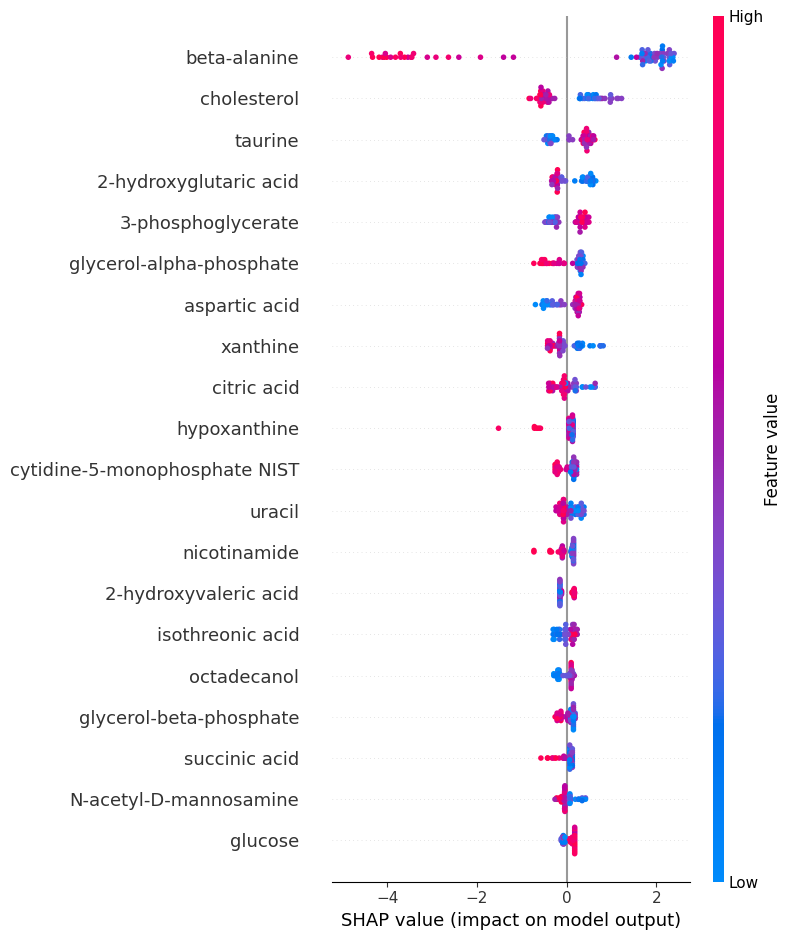

[[ 9  7]
 [ 2 49]]
0.8656716417910447
0.7616421568627452
0.9158878504672897
0.875
0.9607843137254902
0.8786764705882353


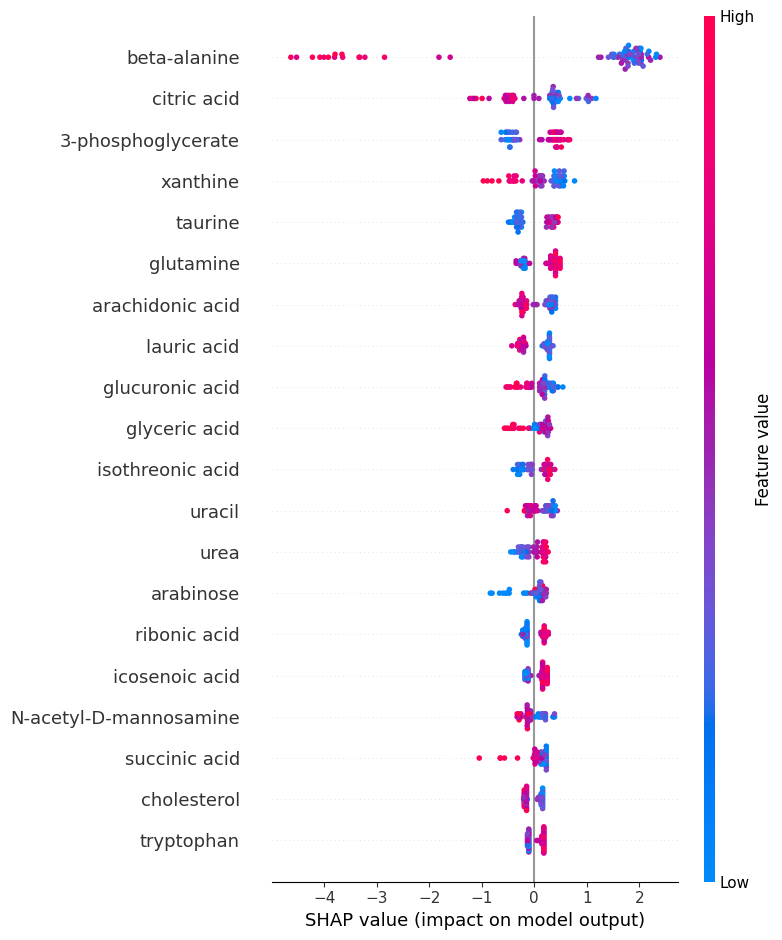

[[11  6]
 [ 4 47]]
0.8529411764705882
0.7843137254901961
0.9038461538461539
0.8867924528301887
0.9215686274509803
0.8904267589388697


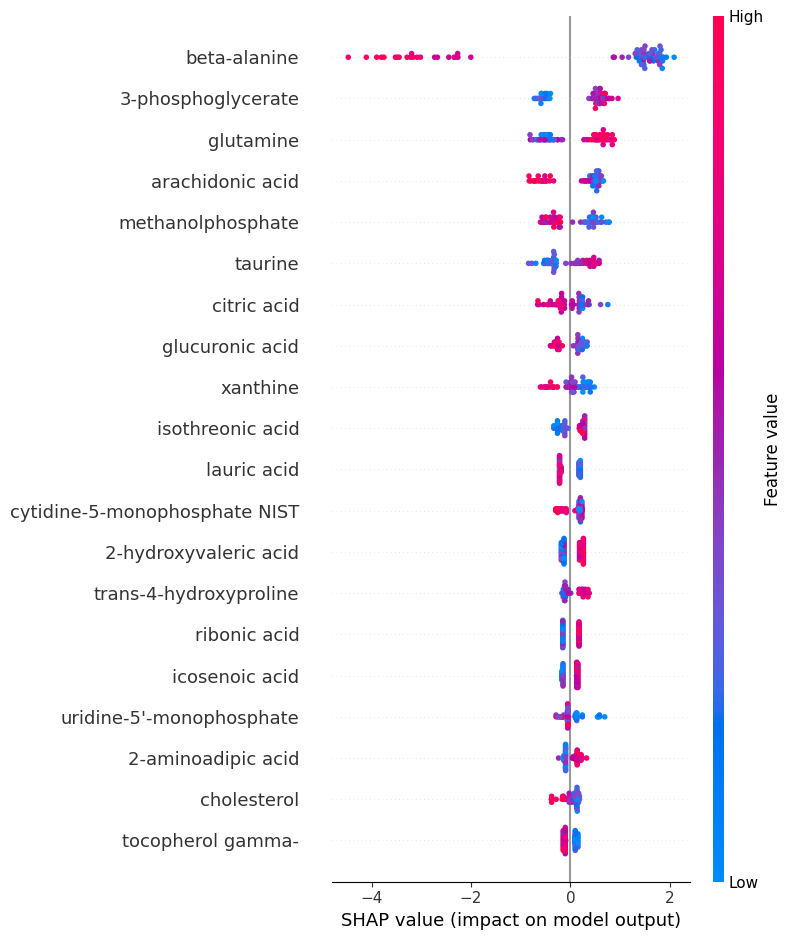

[[12  5]
 [ 2 49]]
0.8970588235294118
0.8333333333333334
0.9333333333333333
0.9074074074074074
0.9607843137254902
0.936562860438293


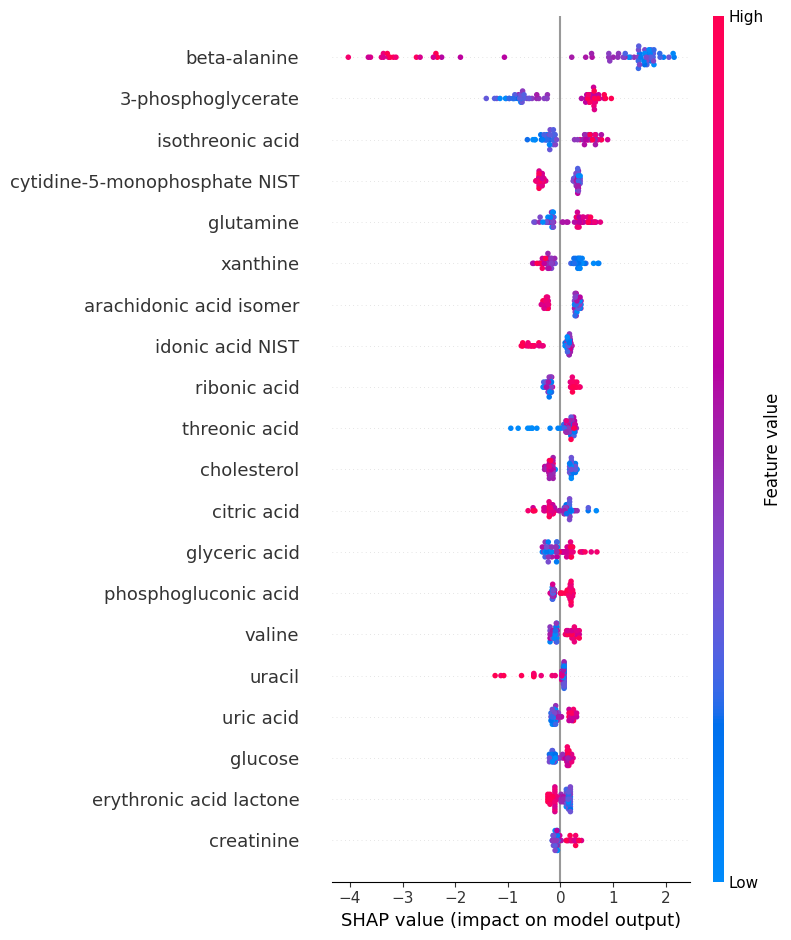

[[13  4]
 [ 3 48]]
0.8970588235294118
0.8529411764705882
0.9320388349514563
0.9230769230769231
0.9411764705882353
0.8961937716262977


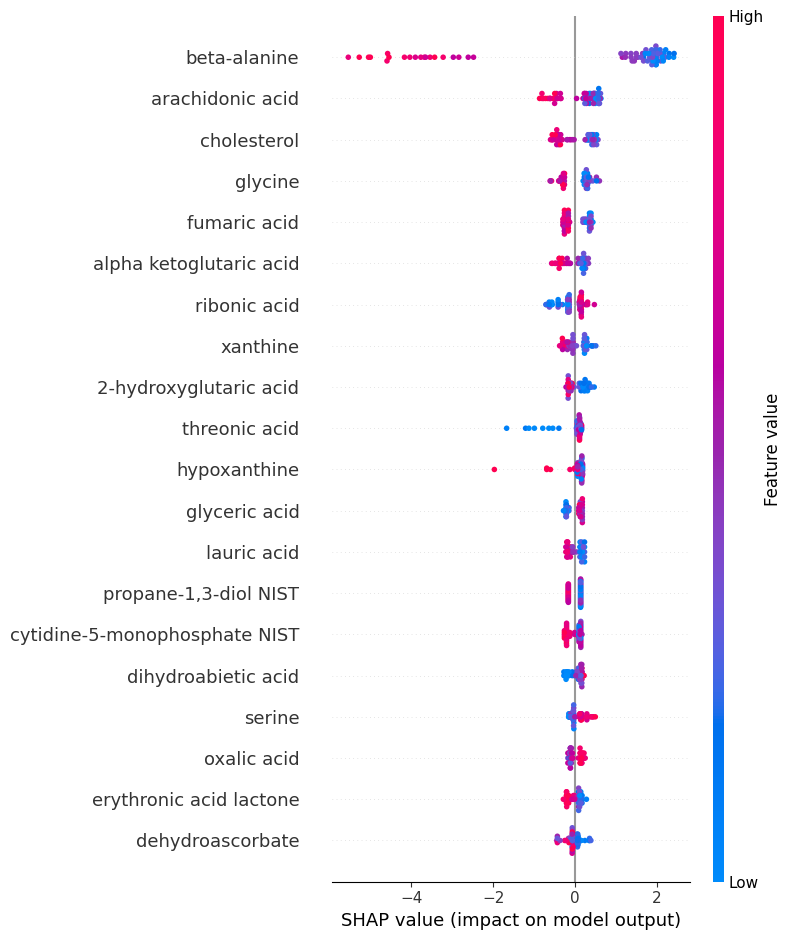

[[ 8  8]
 [ 5 46]]
0.8059701492537313
0.7009803921568627
0.8761904761904761
0.8518518518518519
0.9019607843137255
0.7561274509803921


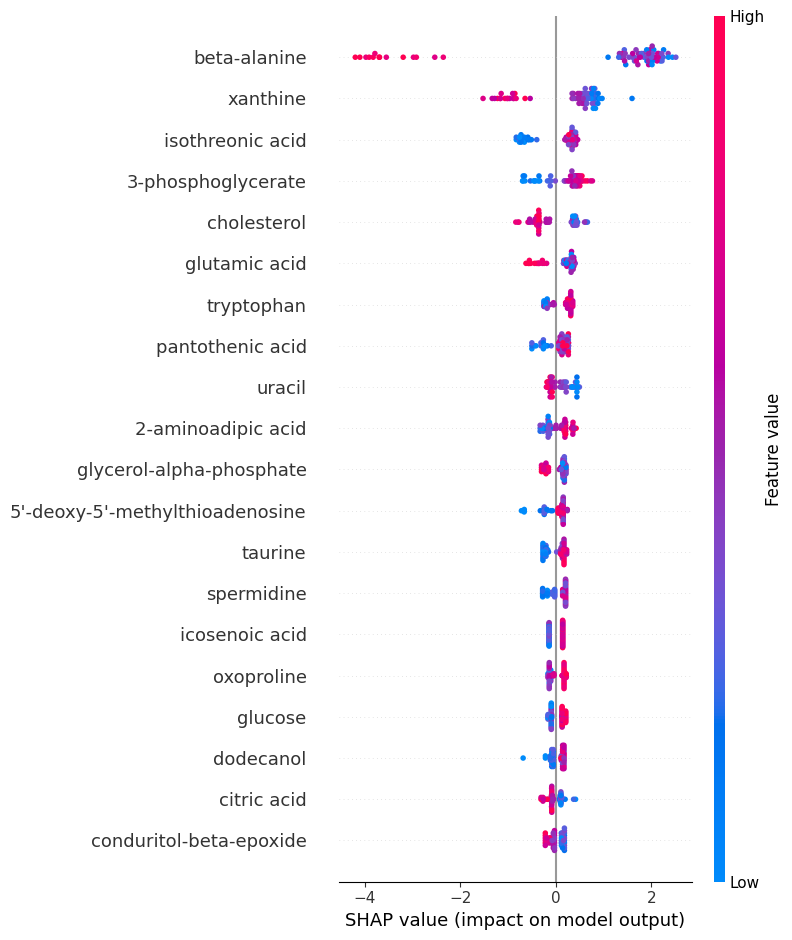

[[10  7]
 [ 2 49]]
0.8676470588235294
0.7745098039215687
0.9158878504672897
0.875
0.9607843137254902
0.8696655132641291


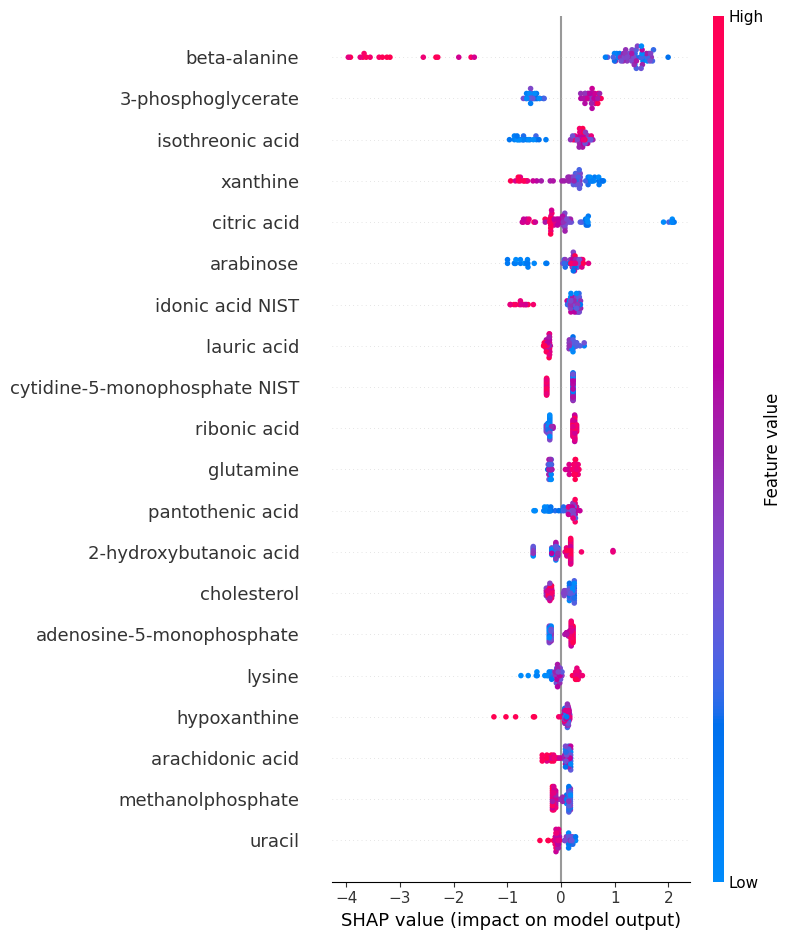

[[10  7]
 [ 6 45]]
0.8088235294117647
0.7352941176470589
0.8737864077669903
0.8653846153846154
0.8823529411764706
0.817762399077278


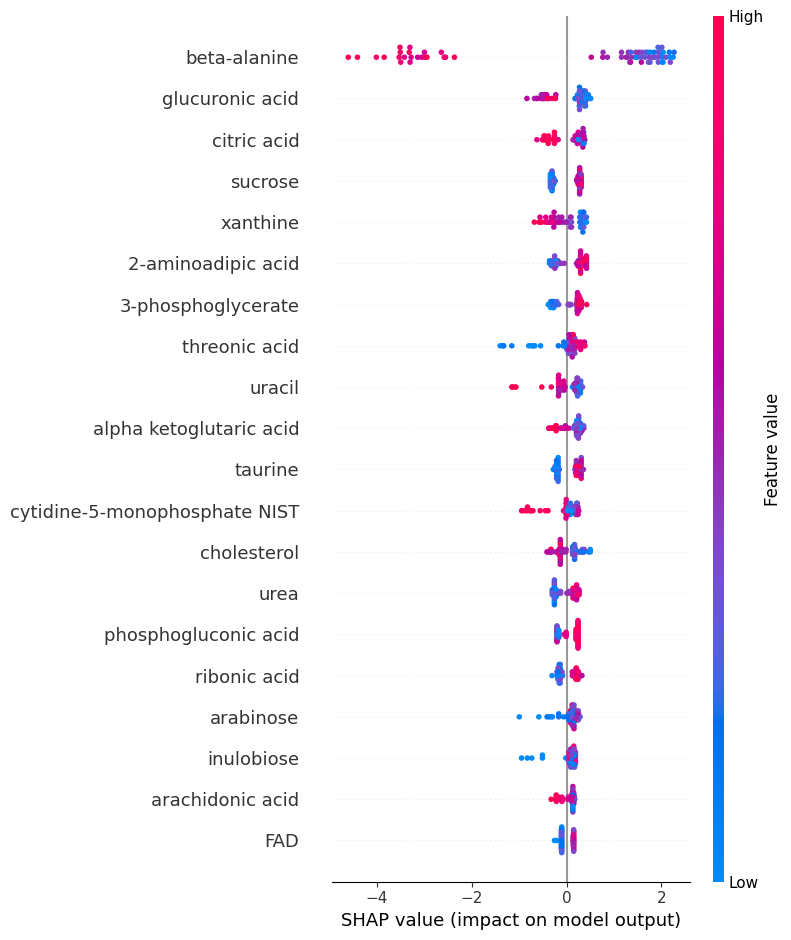

[[11  6]
 [ 3 48]]
0.8676470588235294
0.7941176470588236
0.9142857142857143
0.8888888888888888
0.9411764705882353
0.8304498269896193


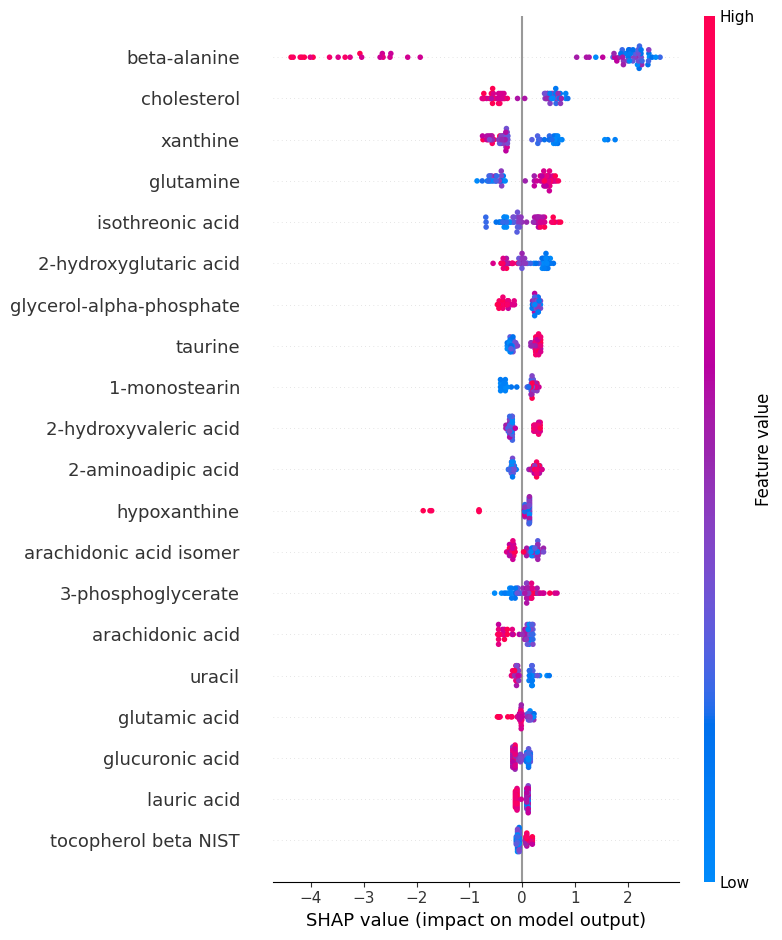

[[ 9  7]
 [ 4 47]]
0.835820895522388
0.7420343137254901
0.8952380952380952
0.8703703703703703
0.9215686274509803
0.8823529411764706


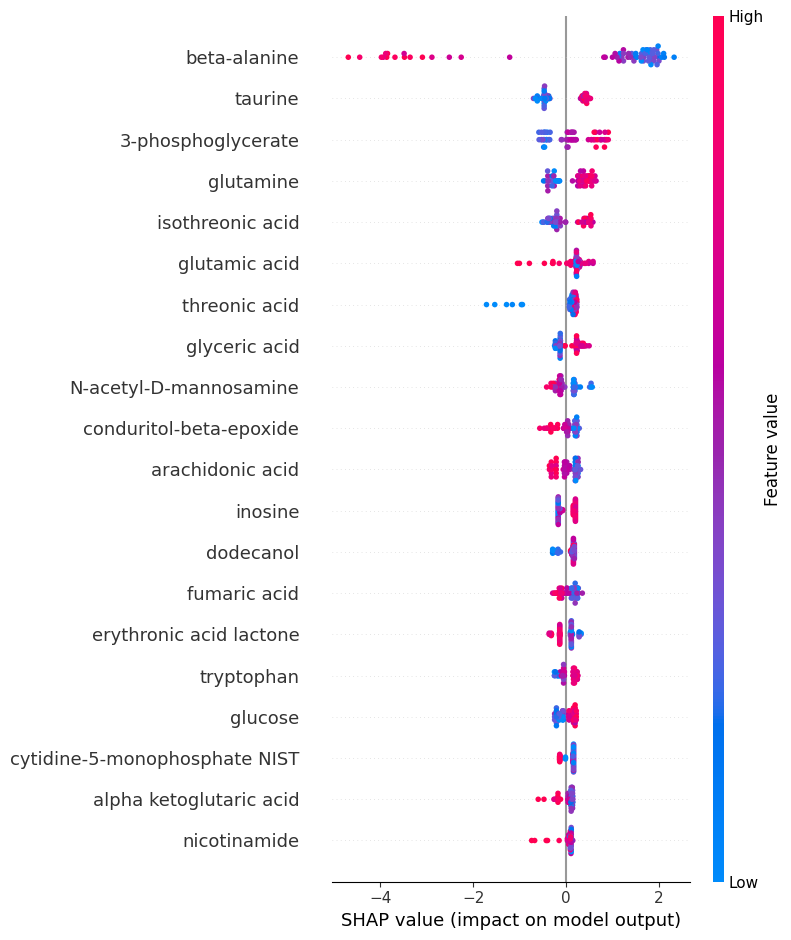

[[12  5]
 [ 4 47]]
0.8676470588235294
0.8137254901960784
0.9126213592233009
0.9038461538461539
0.9215686274509803
0.8719723183391004


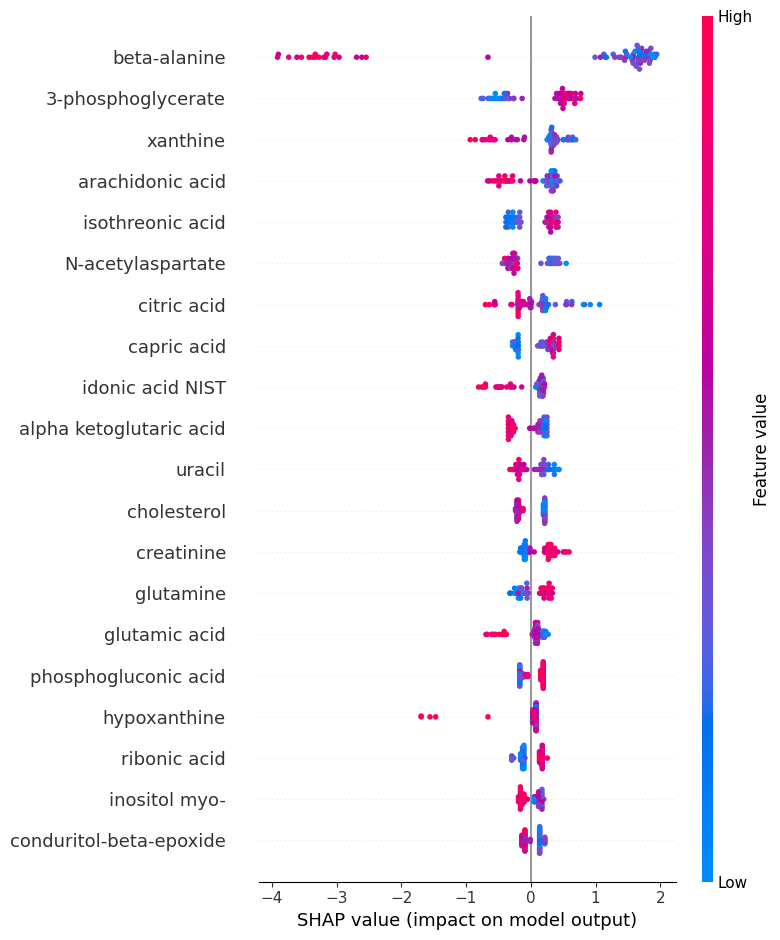

[[12  5]
 [ 4 47]]
0.8676470588235294
0.8137254901960784
0.9126213592233009
0.9038461538461539
0.9215686274509803
0.9031141868512111


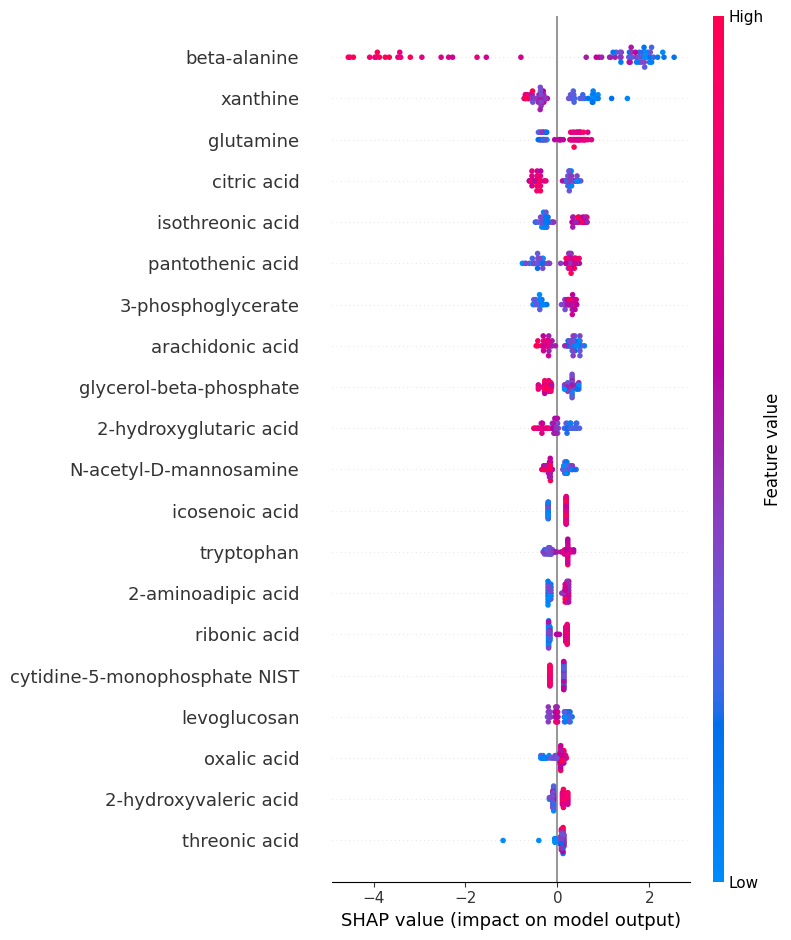

[[11  6]
 [ 3 48]]
0.8676470588235294
0.7941176470588236
0.9142857142857143
0.8888888888888888
0.9411764705882353
0.8431372549019608


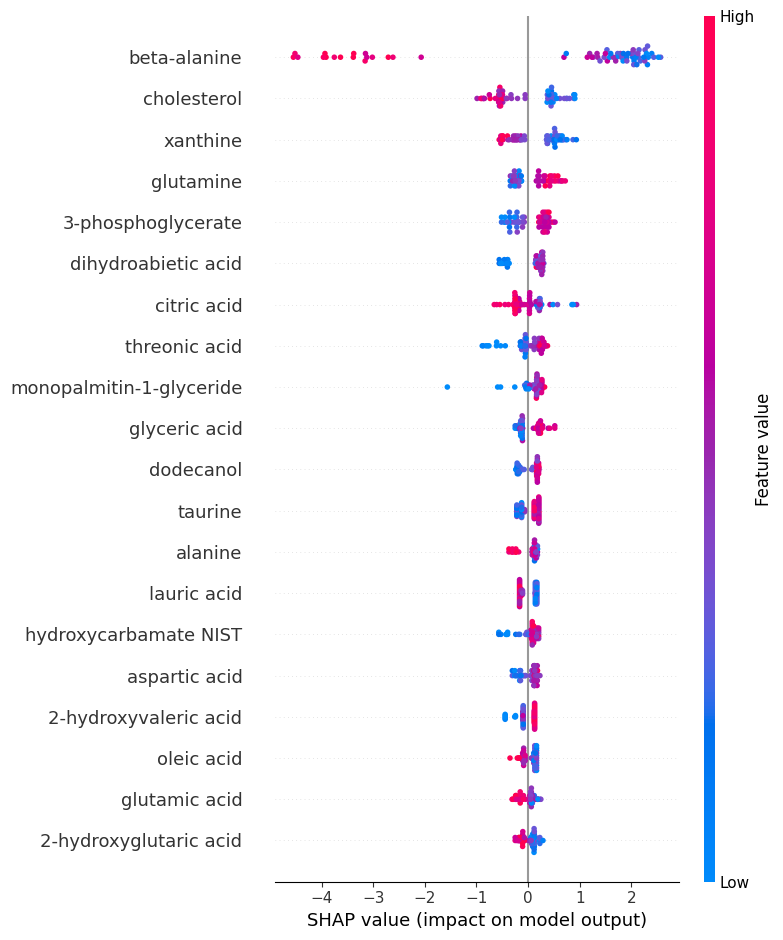

[[10  6]
 [ 2 49]]
0.8805970149253731
0.7928921568627452
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.9093137254901961


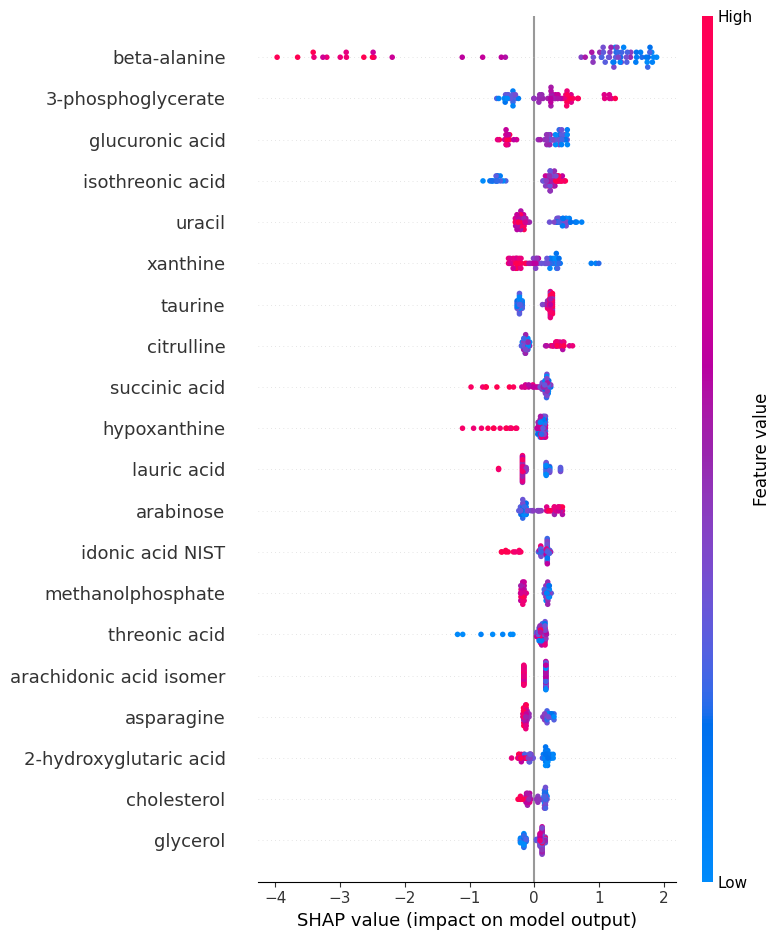

[[13  4]
 [ 1 50]]
0.9264705882352942
0.8725490196078431
0.9523809523809523
0.9259259259259259
0.9803921568627451
0.9480968858131488


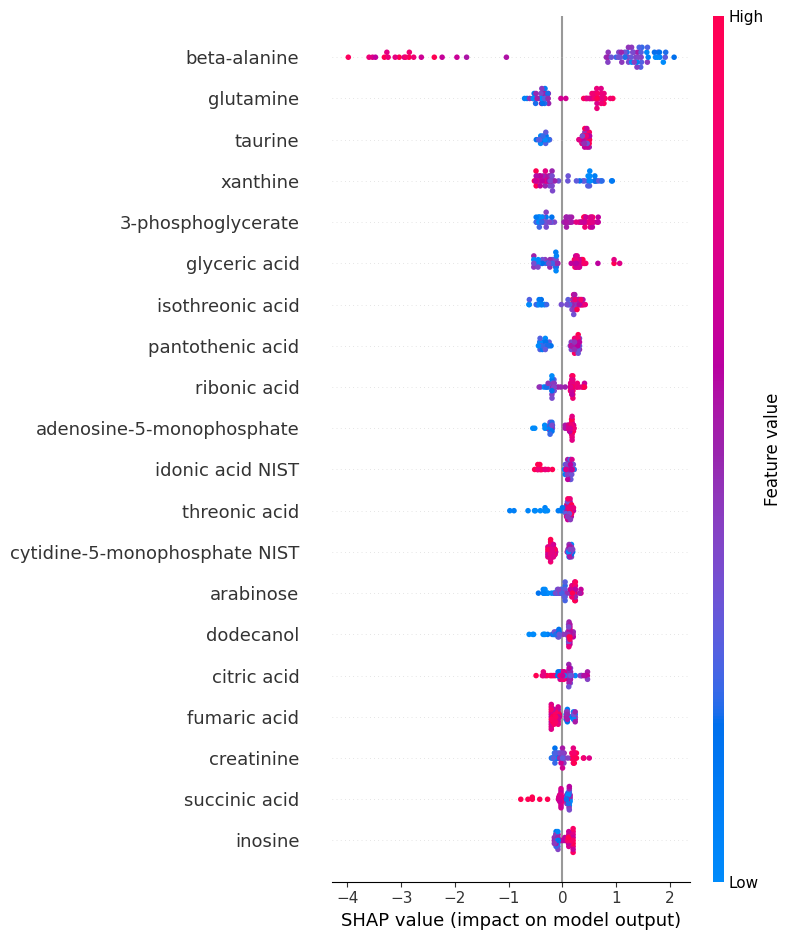

[[15  2]
 [ 5 46]]
0.8970588235294118
0.892156862745098
0.9292929292929293
0.9583333333333334
0.9019607843137255
0.9596309111880046


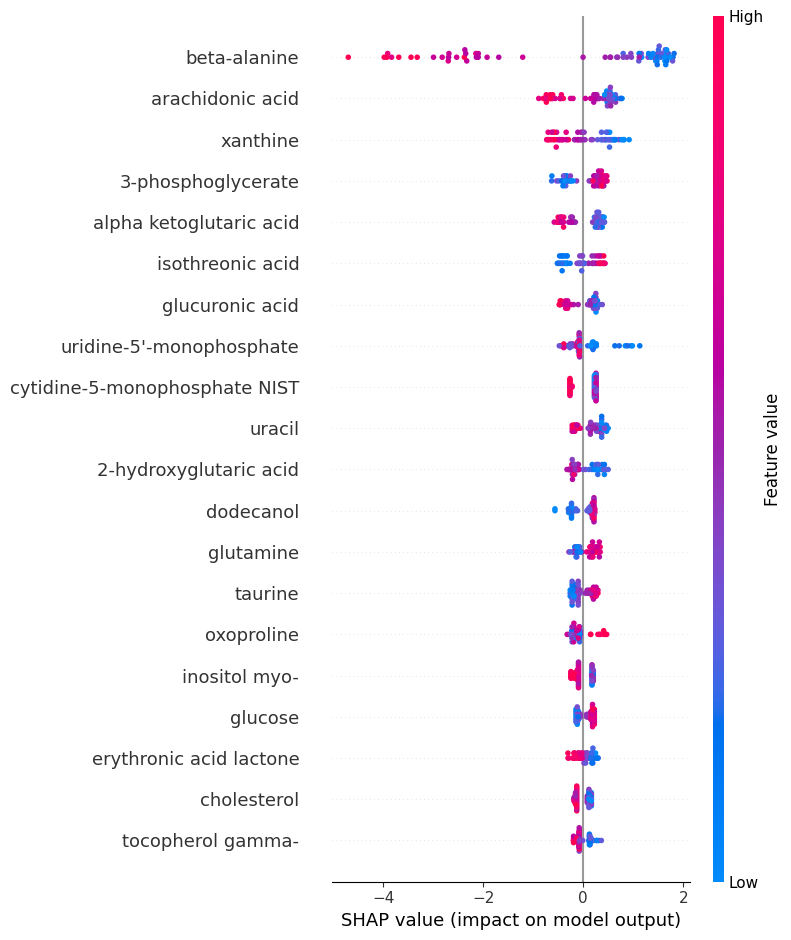

[[ 8  9]
 [ 4 47]]
0.8088235294117647
0.696078431372549
0.8785046728971961
0.8392857142857143
0.9215686274509803
0.7716262975778546


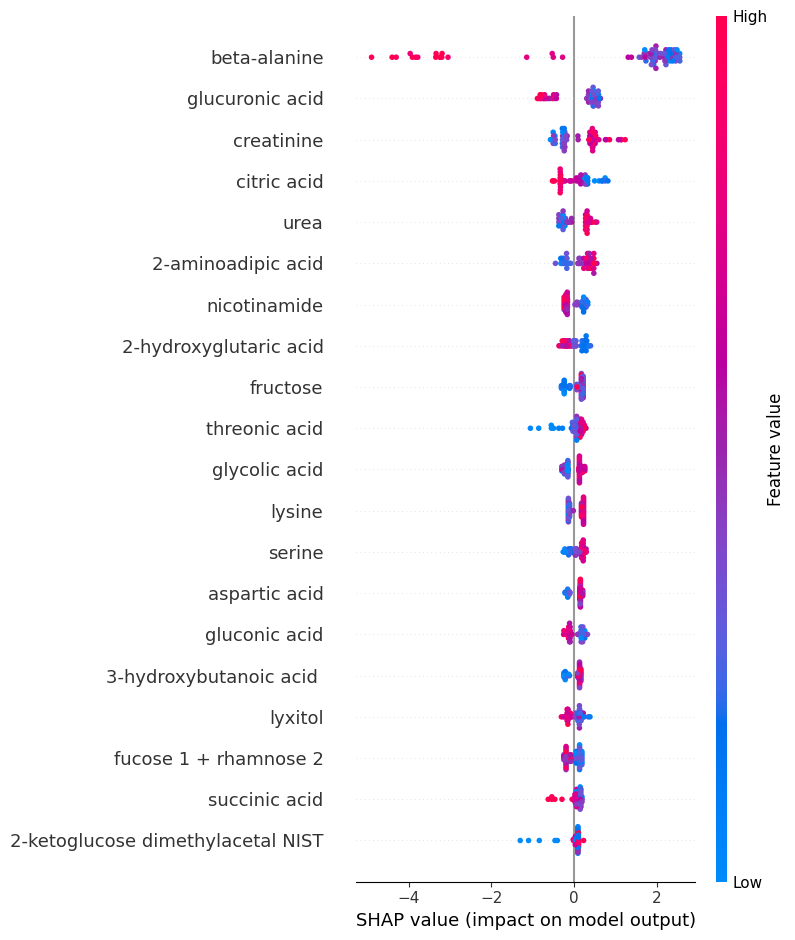

[[10  6]
 [ 2 49]]
0.8805970149253731
0.7928921568627452
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.8235294117647058


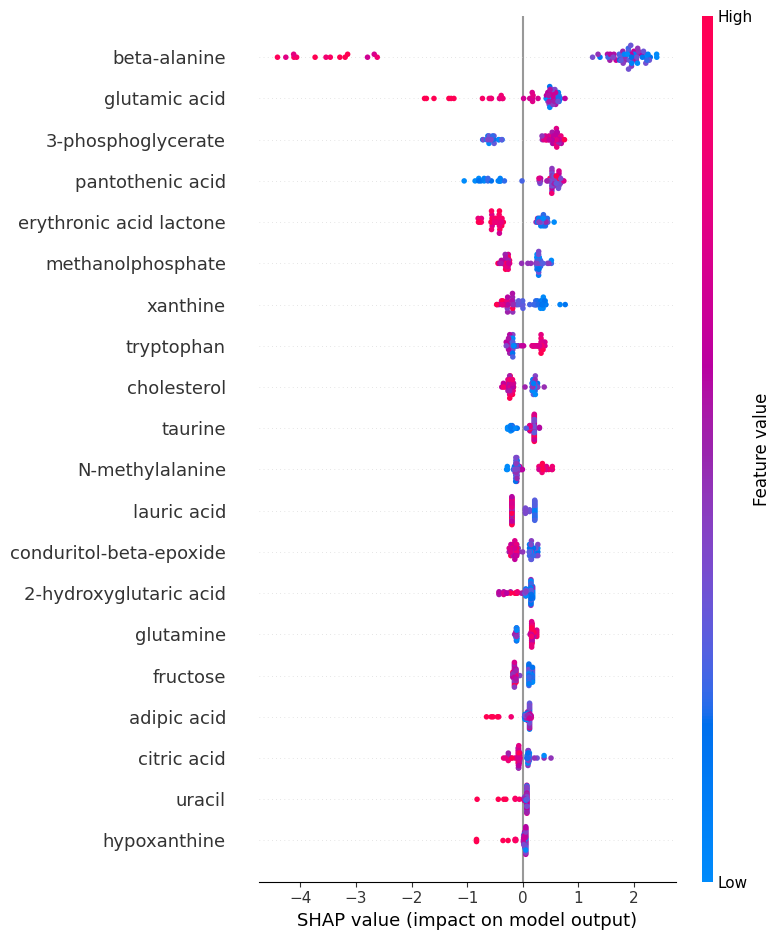

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.882353,0.784314,0.925926,0.877193,0.980392,0.919262,0.588235
fold2,0.882353,0.784314,0.925926,0.877193,0.980392,0.835063,0.588235
fold3,0.867647,0.833333,0.910891,0.92,0.901961,0.867359,0.764706
fold4,0.865672,0.761642,0.915888,0.875,0.960784,0.878676,0.5625
fold5,0.852941,0.784314,0.903846,0.886792,0.921569,0.890427,0.647059
fold6,0.897059,0.833333,0.933333,0.907407,0.960784,0.936563,0.705882
fold7,0.897059,0.852941,0.932039,0.923077,0.941176,0.896194,0.764706
fold8,0.80597,0.70098,0.87619,0.851852,0.901961,0.756127,0.5
fold9,0.867647,0.77451,0.915888,0.875,0.960784,0.869666,0.588235
fold10,0.808824,0.735294,0.873786,0.865385,0.882353,0.817762,0.588235


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 86.6 (±3.1) 
The mean balanced accuracy is: 79.2 (±5.0) 
The mean precision is: 91.4 (±2.0) 
The mean recall is: 89.1 (±2.7) 
The mean F1 score is: 93.8 (±2.9) 
The mean ROC AUC is: 87.1 (±5.3) 
The mean specificity is: 64.7 (±9.7) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [80.7 ; 91.2]
The confidence interval for balanced accucary is [69.8 ; 88.3]
The confidence interval for precision is [87.5 ; 94.3]
The confidence interval for recall is [84.5 ; 94.3]
The confidence interval for F1 score is [89.2 ; 98.0]
The confidence interval for ROC AUC score is [76.3 ; 95.4]
The confidence interval for specificity score is [48.5 ; 82.6]
